In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, roc_curve, confusion_matrix, log_loss, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.manifold import TSNE,Isomap,LocallyLinearEmbedding
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.decomposition import NMF



In [113]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [114]:
df = pd.read_csv('WineQT.csv', sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [115]:
df.shape

(1143, 13)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [117]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [118]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [119]:
df.duplicated().sum()

0

In [120]:
df.drop(columns="Id",inplace=True)

In [121]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [122]:
df['quality'] = (df['quality'] > 5).astype(int)

In [123]:
numerical_data = df.columns.tolist()
numerical_data.remove('quality')
print(numerical_data)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


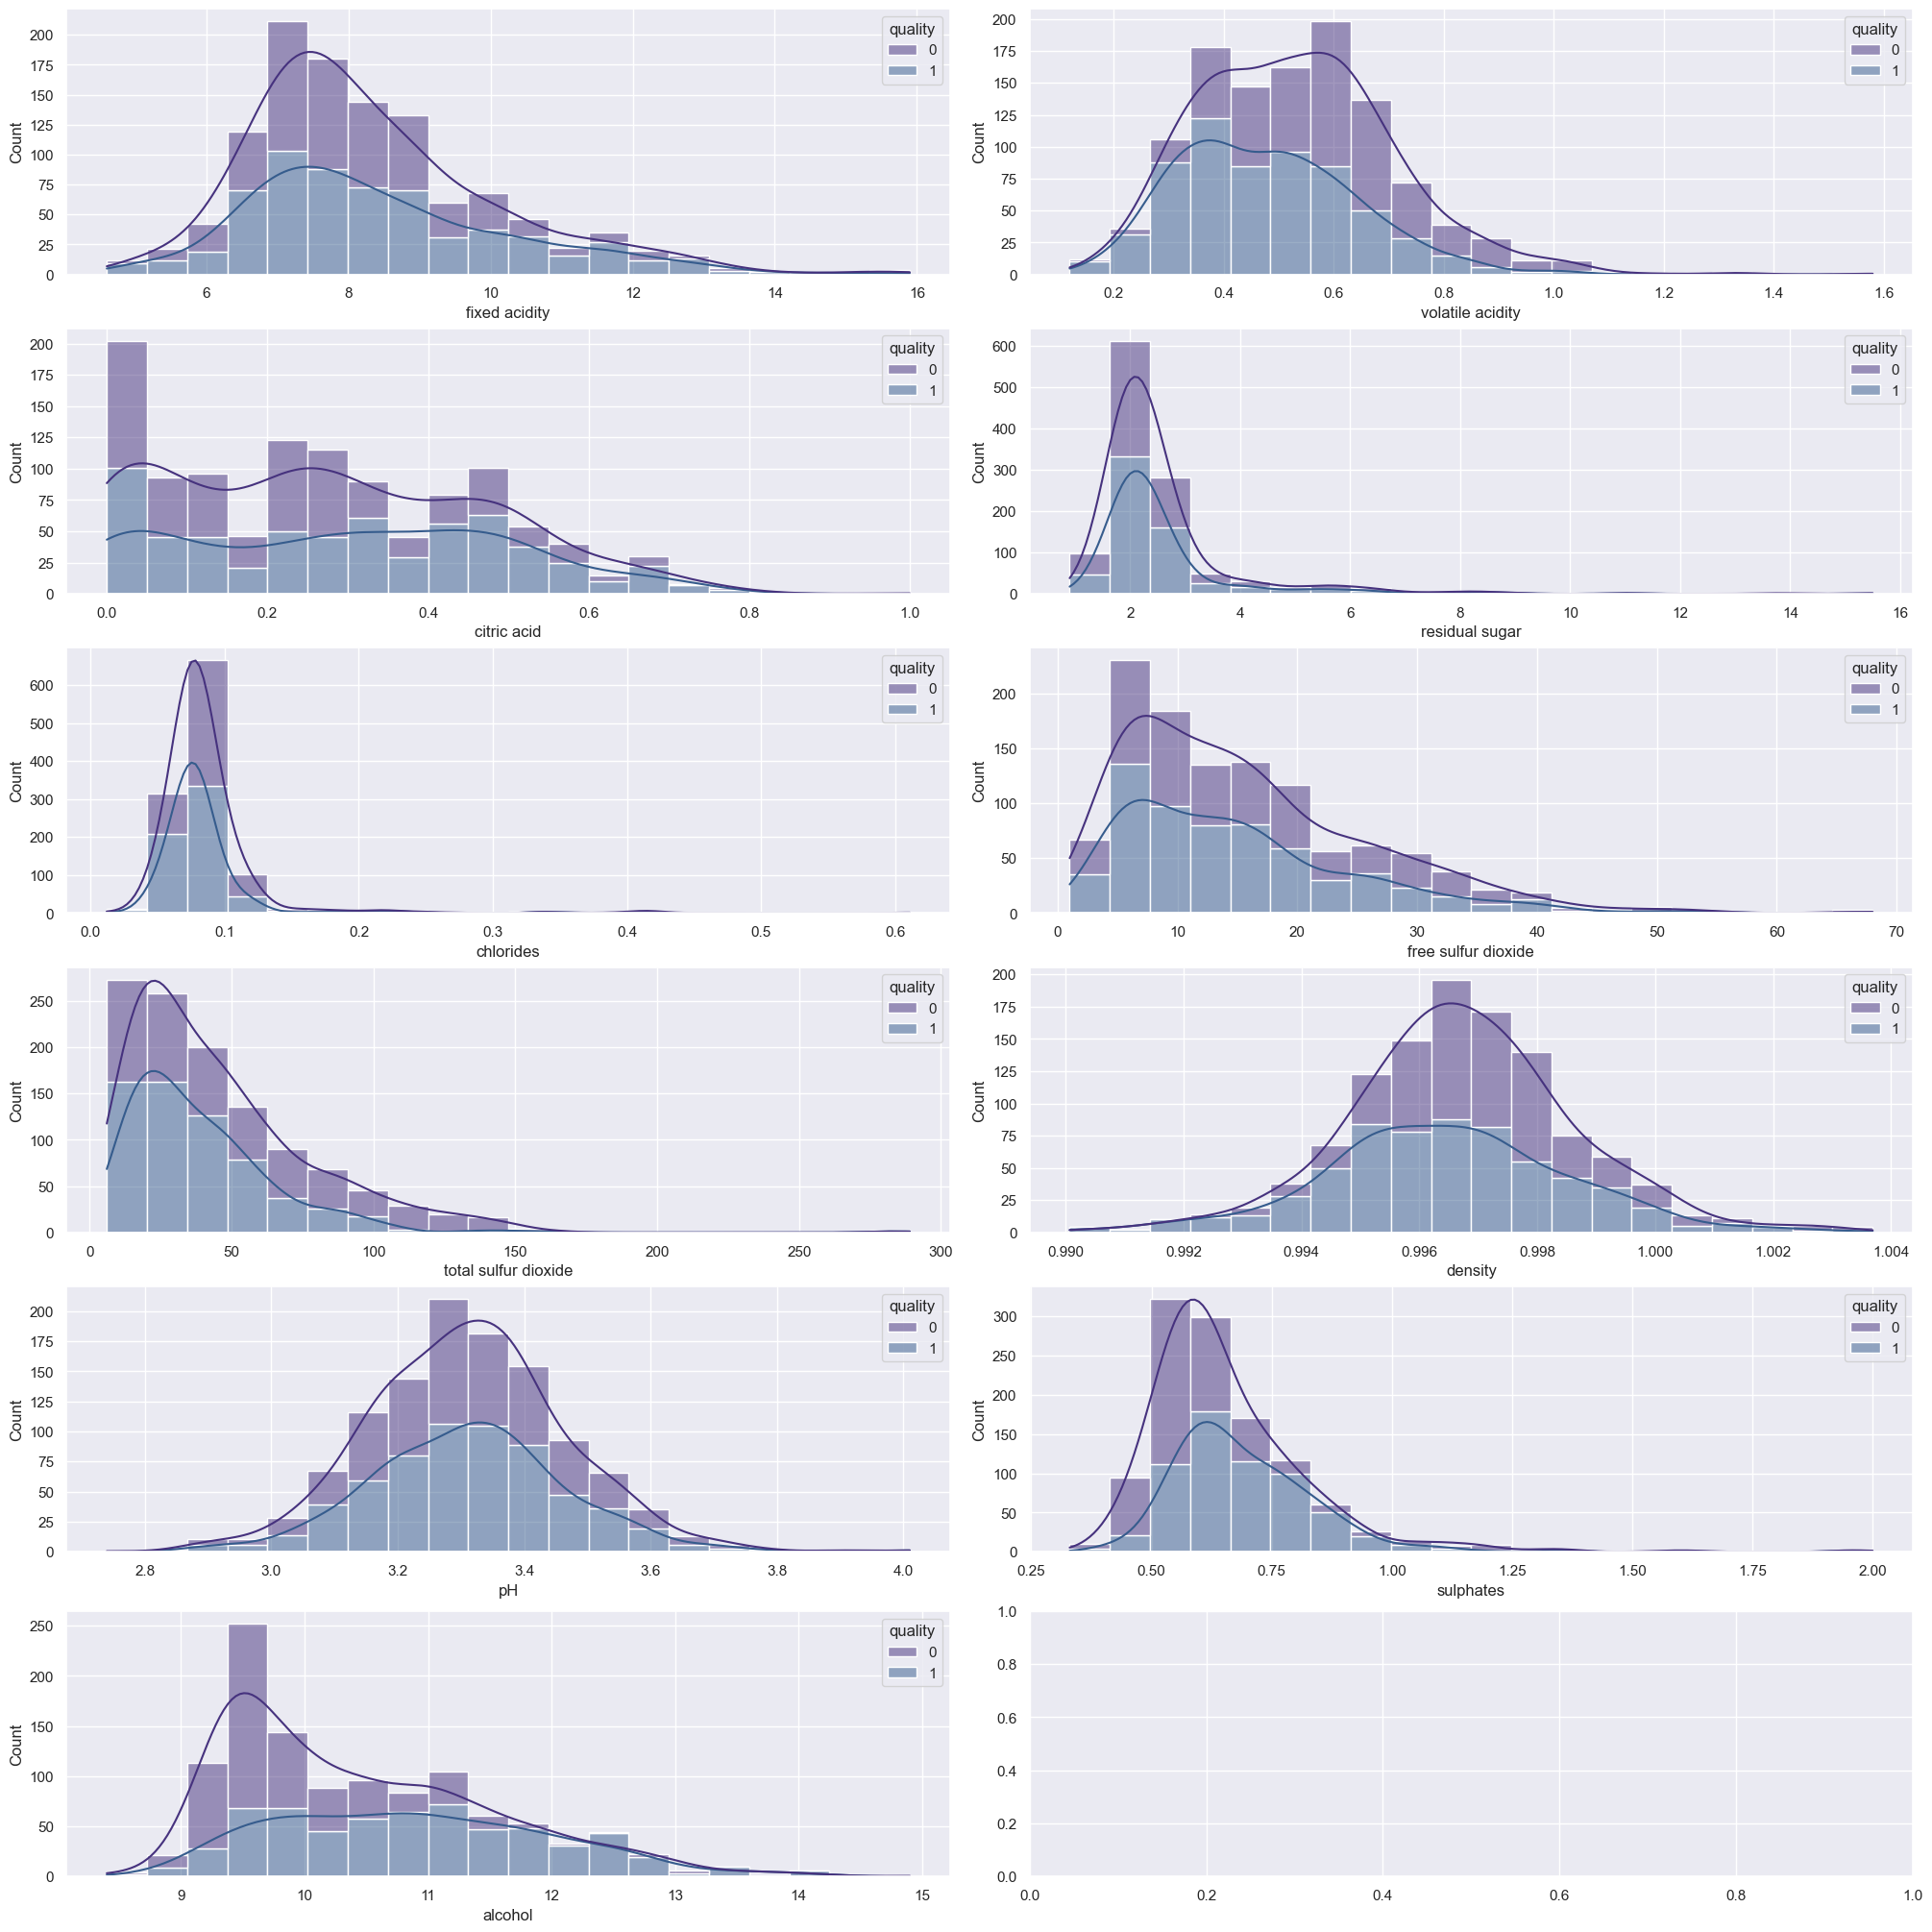

In [124]:
fig, axs = plt.subplots(len(numerical_data)//2 + 1, 2,
                        figsize=(20, 20), constrained_layout=True)

for i, f in enumerate(numerical_data):
    sns.histplot(x=f, data=df, hue='quality', multiple='stack', kde=True,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 6))

plt.show()

In [125]:
ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,8.142146,0.596121,0.235096,2.543582,0.092117,16.404215,54.016284,0.997054,3.308410,0.614195,9.922510
1,8.453140,0.476884,0.296329,2.522544,0.082575,14.952496,39.104670,0.996458,3.313205,0.694283,10.878878


<Axes: xlabel='quality'>

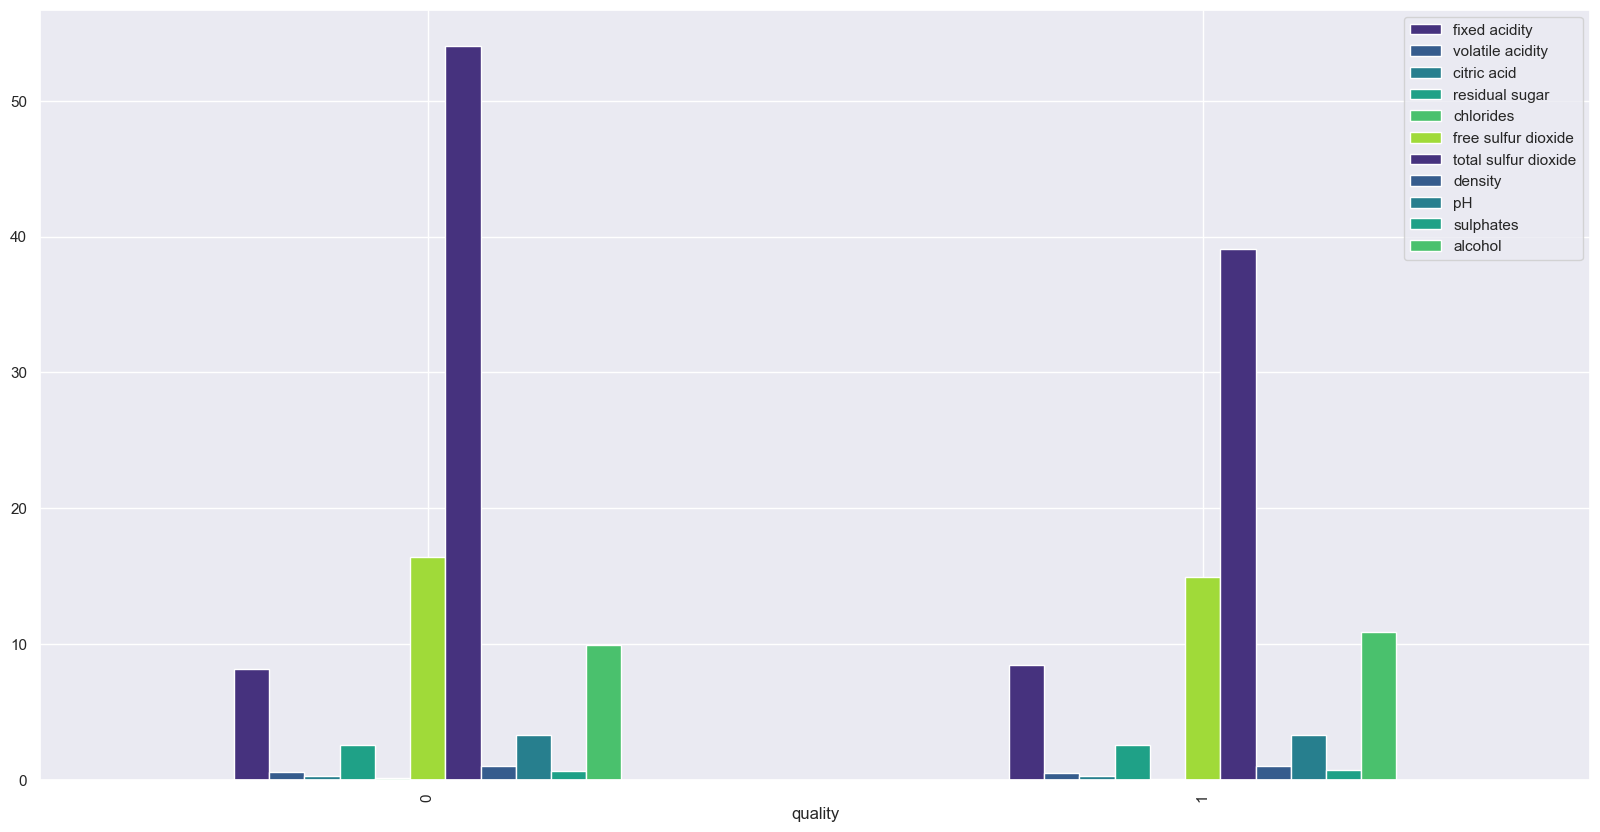

In [126]:
ave_qu.plot(kind="bar",figsize=(20,10))

<Axes: xlabel='quality', ylabel='count'>

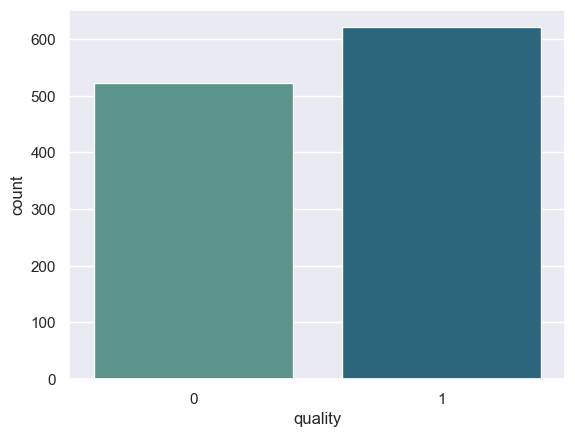

In [127]:
fig, ax = plt.subplots()

sns.countplot(x='quality', data=df,
              palette=sns.color_palette("crest", 2))

In [128]:
scaler = StandardScaler()
df2 = df.copy()
df[numerical_data] = scaler.fit_transform(df[numerical_data])

In [129]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,0
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,0
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,0
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,1
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,0


In [130]:
X = df.drop('quality', axis=1)
y = df['quality']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

results = pd.DataFrame(
    columns=["Algorithm",  "CV-AUC", "CV-Accuracy", "CV-F1",
             "AUC", "Accuracy", "F1",])
results.set_index('Algorithm', inplace=True)

In [132]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


cmap_base = 'inferno'
vmin, vmax = 0.4, 0.9
cmap = truncate_colormap(cmap_base, vmin, vmax)

In [133]:
def test_models(classifiers, X_train, X_test, y_train, y_test, results):

    sns.set_palette('hls')
    confusion_matrix_fig, confusion_matrix_ax =\
        plt.subplots(1, len(classifiers), figsize=(
            15, 4), constrained_layout=True,)
    all_curves_fig, all_curves_ax = plt.subplots(figsize=(10, 10))
    for i, name in enumerate(classifiers):
        classifier = classifiers[name]
        classifier.fit(X_train, y_train)

        if hasattr(classifier, 'predict_proba'):
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        elif hasattr(classifier, 'decision_function'):
            decision_function = classifier.decision_function(X_test)
            y_pred_prob = 1 / (1 + np.exp(-decision_function))
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        print(name+':DONE', end='; ')

        pred = classifier.predict(X_test)
        f1 = f1_score(y_test, pred)
        acc = accuracy_score(y_test, pred)

        results.loc[name, "F1"] = f1
        results.loc[name, "AUC"] = roc_auc
        results.loc[name, "Accuracy"] = acc

        all_curves_ax.plot(fpr, tpr, lw=2,
                           label=f'{name} (AUC = {roc_auc:.2f})')

        cm = confusion_matrix(y_test, pred)
        ConfusionMatrixDisplay(cm).plot(
            ax=confusion_matrix_ax[i], colorbar=False, cmap=cmap)
        confusion_matrix_ax[i].grid(False)
        confusion_matrix_ax[i].set_title(name)

    all_curves_ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    all_curves_ax.set_title('All ROC Curves')
    all_curves_ax.set_xlabel('False Positive Rate')
    all_curves_ax.set_ylabel('True Positive Rate')
    all_curves_ax.legend(loc='lower right')
    all_curves_fig.show()
    confusion_matrix_fig.show()
    results.sort_values(by='AUC', ascending=False)
    return results

In [134]:
from sklearn.model_selection import cross_validate


def cross_validate_models(classifiers, X, y, cv=5, results=results):
    for name in classifiers:
        print(f"{name}... ", end="")
        classifier = classifiers[name]
        scoring_metrics = ['accuracy', 'f1', 'roc_auc']
        cv_results = cross_validate(
            classifier, X, y, cv=cv, scoring=scoring_metrics)
        acc = cv_results['test_accuracy'].mean()
        f1 = cv_results['test_f1'].mean()
        auc = cv_results['test_roc_auc'].mean()
        results.loc[name, 'CV-F1'] = f1
        results.loc[name, 'CV-AUC'] = auc
        results.loc[name, 'CV-Accuracy'] = acc

SVC... LogisticRegression... SVC:DONE; RandomForest:DONE; AdaBoost:DONE; LogisticRegression:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
RandomForest,NaN,NaN,NaN,0.850883,0.786026,0.807843
SVC,0.839278,0.765887,0.782847,0.815668,0.764192,0.784
AdaBoost,NaN,NaN,NaN,0.801728,0.742358,0.766798
LogisticRegression,0.823705,0.757111,0.776122,0.778955,0.729258,0.741667


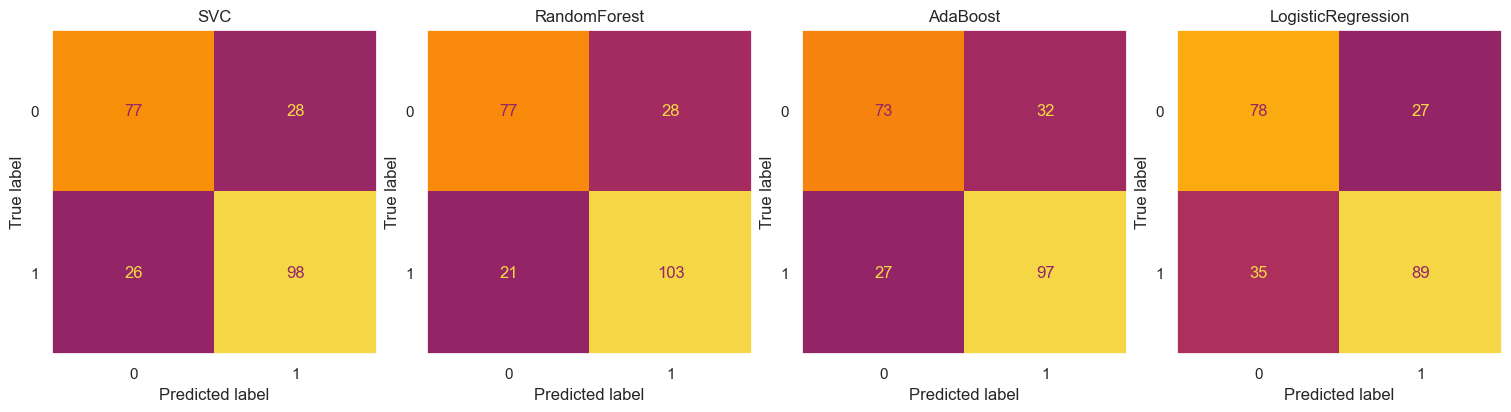

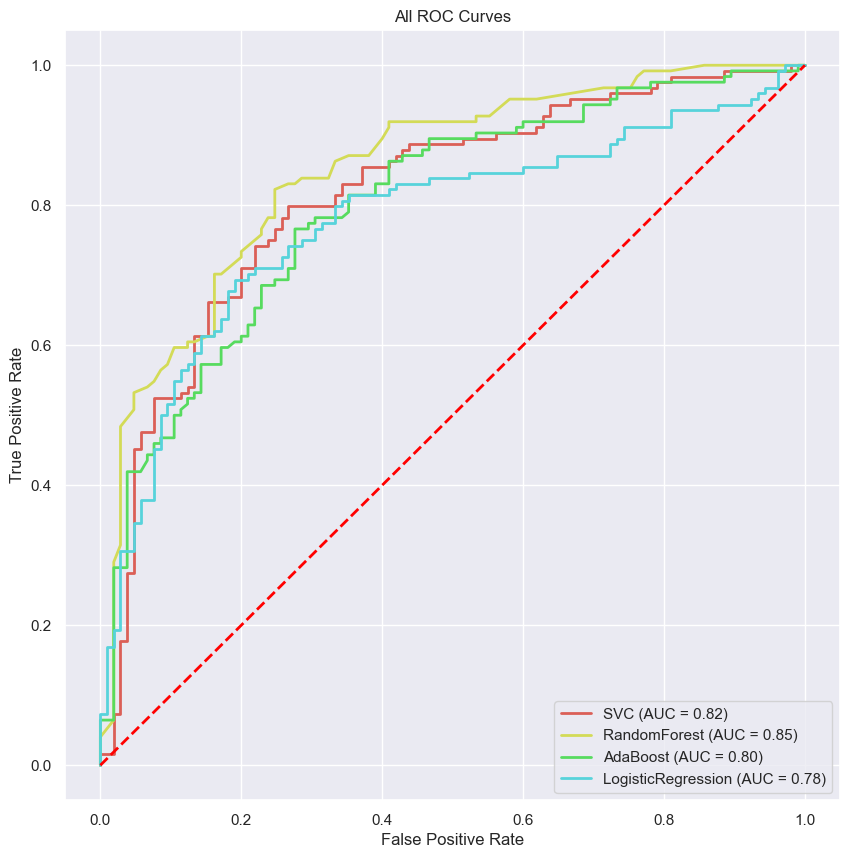

In [135]:
classifiers = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'LogisticRegression' : LogisticRegression()
}

classifiers_cv = {
    'SVC': SVC(),
    'LogisticRegression' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_train,
                      y_train, results=results, cv=3)
results = test_models(classifiers, X_train, X_test, y_train, y_test, results)
results.sort_values(by='AUC', ascending=False)


## Feature extraction

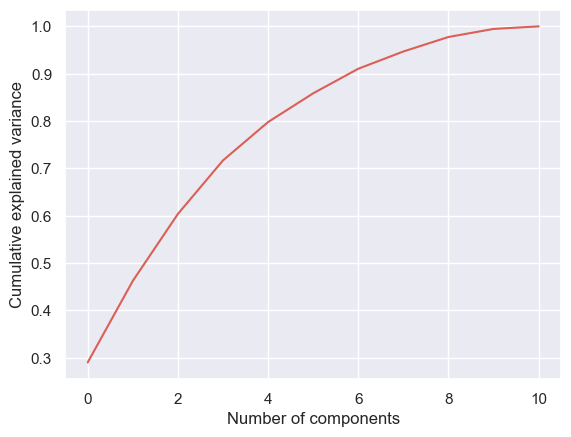

In [136]:
from sklearn.decomposition import PCA

#n_components - postavljen na vrednost vecu od 1 vraca navedeni broj komponenata, izmedju 0 i 1 vraca navadenu vrednost varijanse
#whiten - vrednosti glavnih komponenti se svode na srednju vrednost a varijansa na jedinicnu
#svd_solver - pozivanje stohastickog algoritma

pca = PCA(random_state=42)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

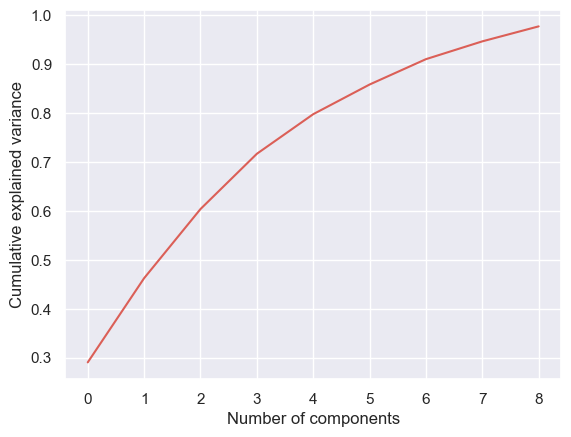

In [137]:
pca = PCA(n_components=0.95, whiten=True,random_state=42)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [138]:
X_pca_train.shape

(914, 9)

SVC + PCA... RandomForest + PCA... AdaBoost + PCA... LogisticRegression + PCA... SVC + PCA:DONE; RandomForest + PCA:DONE; AdaBoost + PCA:DONE; LogisticRegression + PCA:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
RandomForest,NaN,NaN,NaN,0.850883,0.786026,0.807843
RandomForest + PCA,0.851601,0.76809,0.78651,0.839171,0.764192,0.790698
SVC + PCA,0.83543,0.757129,0.772341,0.81874,0.768559,0.785425
SVC,0.839278,0.765887,0.782847,0.815668,0.764192,0.784
AdaBoost,NaN,NaN,NaN,0.801728,0.742358,0.766798
LogisticRegression + PCA,0.82259,0.748343,0.768242,0.78318,0.746725,0.758333
LogisticRegression,0.823705,0.757111,0.776122,0.778955,0.729258,0.741667
AdaBoost + PCA,0.80176,0.733042,0.757021,0.752112,0.68559,0.704918


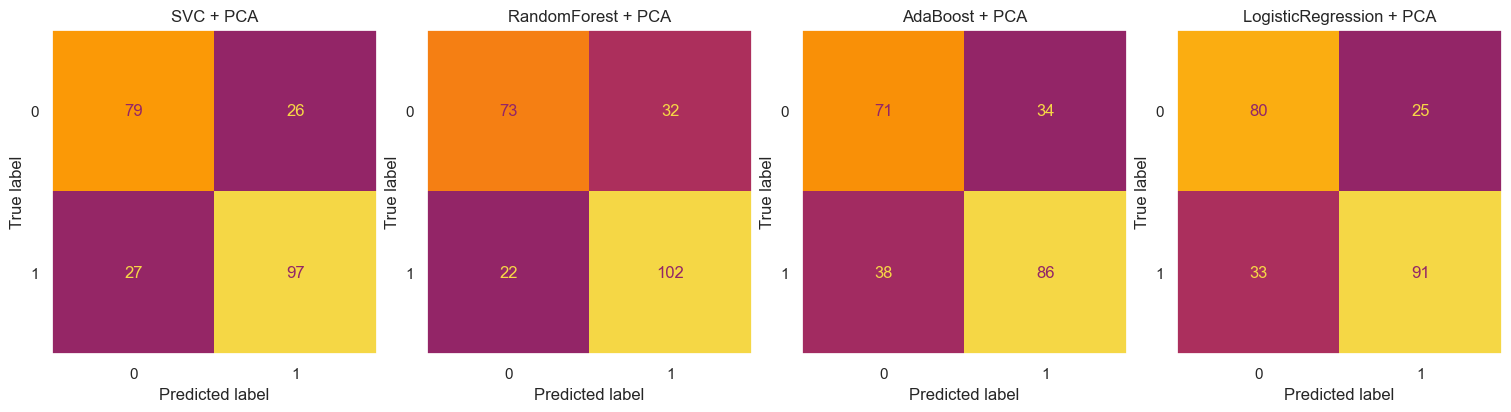

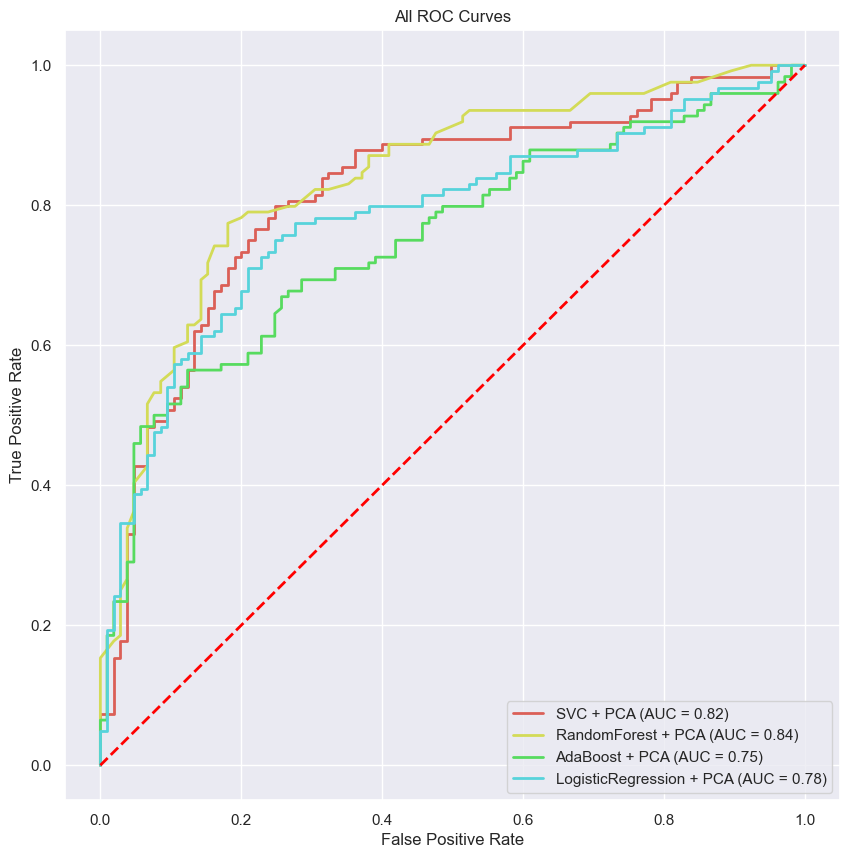

In [139]:
classifiers = {
    'SVC + PCA': SVC(),
    'RandomForest + PCA': RandomForestClassifier(),
    'AdaBoost + PCA':AdaBoostClassifier(),
    'LogisticRegression + PCA' : LogisticRegression()
}

classifiers_cv = {
    'SVC + PCA': SVC(),
    'RandomForest + PCA': RandomForestClassifier(),
    'AdaBoost + PCA':AdaBoostClassifier(),
    'LogisticRegression + PCA' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_pca_train,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_pca_train, X_pca_test,
                      y_train, y_test, results)
results.sort_values(by='AUC', ascending=False)


In [140]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
# Create linearly inseparable data

kpca = KernelPCA(kernel="rbf", gamma=15, n_components=8)
X_kernel_pca = kpca.fit_transform(X_train)
X_test_kernel_pca = kpca.transform(X_test)

print("Original number of features:", X_train.shape[1])
print("Reduced number of features:", X_kernel_pca.shape[1])

Original number of features: 11
Reduced number of features: 8


SVC + KernelPCA... RandomForest + KernelPCA... AdaBoost + KernelPCA... LogisticRegression + KernelPCA... SVC + KernelPCA:DONE; RandomForest + KernelPCA:DONE; AdaBoost + KernelPCA:DONE; LogisticRegression + KernelPCA:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
RandomForest,NaN,NaN,NaN,0.850883,0.786026,0.807843
SVC + PCA,0.83543,0.757129,0.772341,0.81874,0.768559,0.785425
SVC,0.839278,0.765887,0.782847,0.815668,0.764192,0.784
RandomForest + PCA,0.851601,0.76809,0.78651,0.839171,0.764192,0.790698
LogisticRegression + PCA,0.82259,0.748343,0.768242,0.78318,0.746725,0.758333
AdaBoost,NaN,NaN,NaN,0.801728,0.742358,0.766798
LogisticRegression,0.823705,0.757111,0.776122,0.778955,0.729258,0.741667
AdaBoost + PCA,0.80176,0.733042,0.757021,0.752112,0.68559,0.704918
RandomForest + KernelPCA,0.580769,0.583175,0.7088,0.536713,0.541485,0.69914


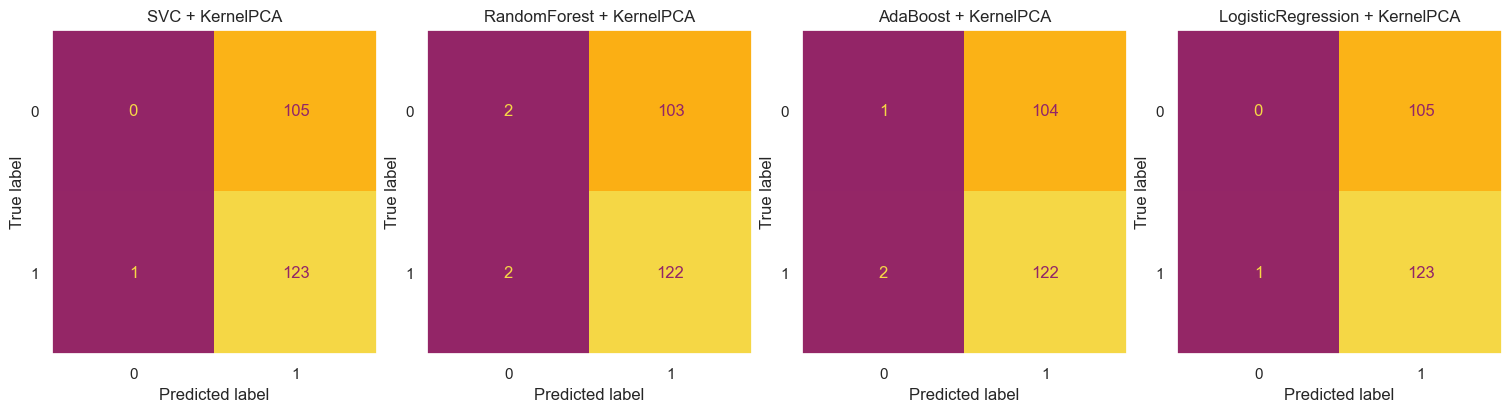

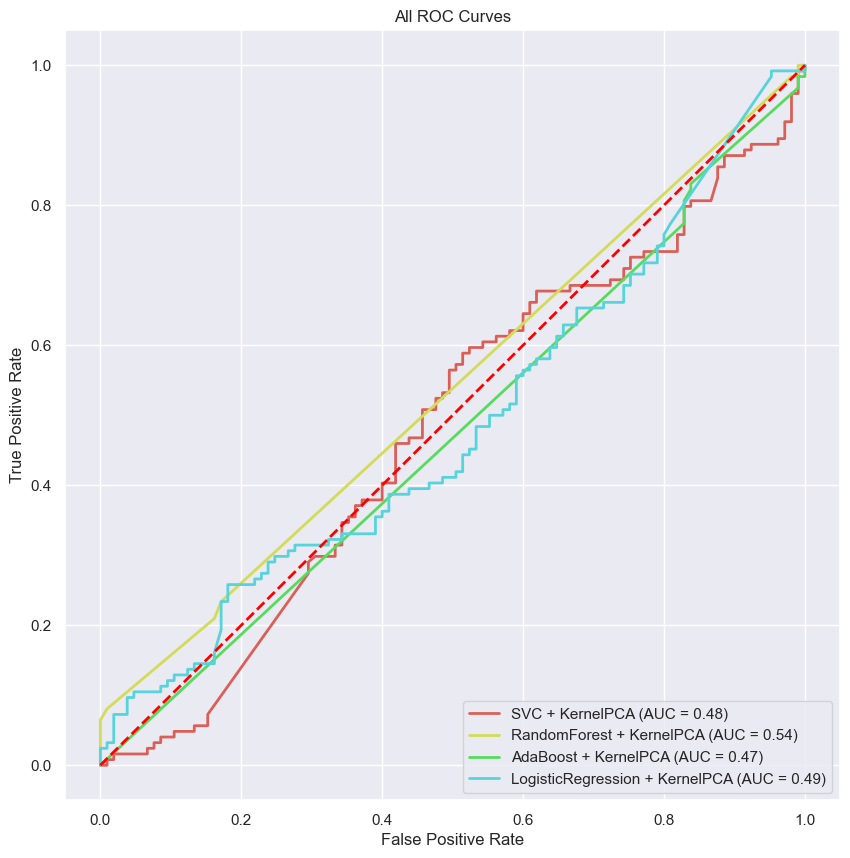

In [141]:
classifiers = {
    'SVC + KernelPCA': SVC(),
    'RandomForest + KernelPCA': RandomForestClassifier(),
    'AdaBoost + KernelPCA':AdaBoostClassifier(),
    'LogisticRegression + KernelPCA' : LogisticRegression()
}

classifiers_cv = {
    'SVC + KernelPCA': SVC(),
    'RandomForest + KernelPCA': RandomForestClassifier(),
    'AdaBoost + KernelPCA':AdaBoostClassifier(),
    'LogisticRegression + KernelPCA' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_kernel_pca,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_kernel_pca, X_test_kernel_pca,
                      y_train, y_test, results)
results.sort_values(by='Accuracy', ascending=False)

In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ("kpca", KernelPCA()),
    ("svc", SVC())
])

# Define parameter grid for Kernel PCA and SVM
param_grid = {
    "kpca__kernel": ["rbf", "sigmoid", "poly"],
    "kpca__gamma": [0.01, 0.1, 1.0, 10.0],
    "kpca__n_components": [2, 3, 4],
    "svc__C": [0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Print the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (Accuracy):", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'kpca__gamma': 0.01, 'kpca__kernel': 'sigmoid', 'kpca__n_components': 4, 'svc__C': 1}
Best Cross-Validation Score (Accuracy): 0.741776256530355
Test Set Accuracy: 0.7248908296943232


In [143]:
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(kernel="sigmoid", gamma=10.0, n_components=3)
X_kernel_pca = kpca.fit_transform(X_train)
X_test_kernel_pca = kpca.transform(X_test)

print("Original number of features:", X_test.shape[1])
print("Reduced number of features:", X_kernel_pca.shape[1])

Original number of features: 11
Reduced number of features: 3


SVC + KernelPCA... RandomForest + KernelPCA... AdaBoost + KernelPCA... LogisticRegression + KernelPCA... SVC + KernelPCA:DONE; RandomForest + KernelPCA:DONE; AdaBoost + KernelPCA:DONE; LogisticRegression + KernelPCA:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
RandomForest,NaN,NaN,NaN,0.850883,0.786026,0.807843
RandomForest + PCA,0.851601,0.76809,0.78651,0.839171,0.764192,0.790698
SVC + PCA,0.83543,0.757129,0.772341,0.81874,0.768559,0.785425
SVC,0.839278,0.765887,0.782847,0.815668,0.764192,0.784
AdaBoost,NaN,NaN,NaN,0.801728,0.742358,0.766798
RandomForest + KernelPCA,0.812676,0.738514,0.751947,0.797849,0.733624,0.753036
LogisticRegression + PCA,0.82259,0.748343,0.768242,0.78318,0.746725,0.758333
LogisticRegression,0.823705,0.757111,0.776122,0.778955,0.729258,0.741667
LogisticRegression + KernelPCA,0.794011,0.739607,0.760663,0.770737,0.703057,0.725806


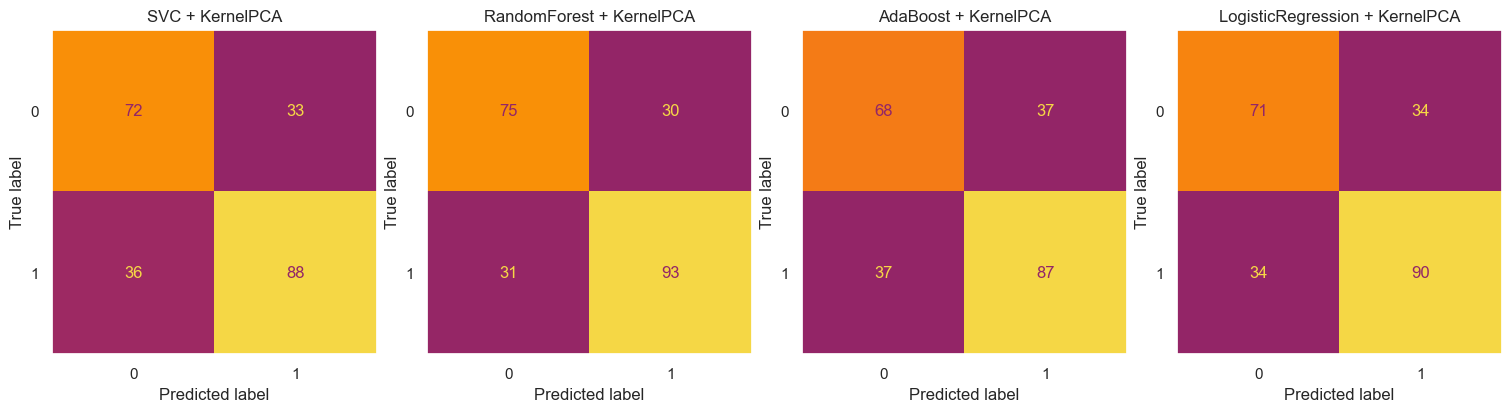

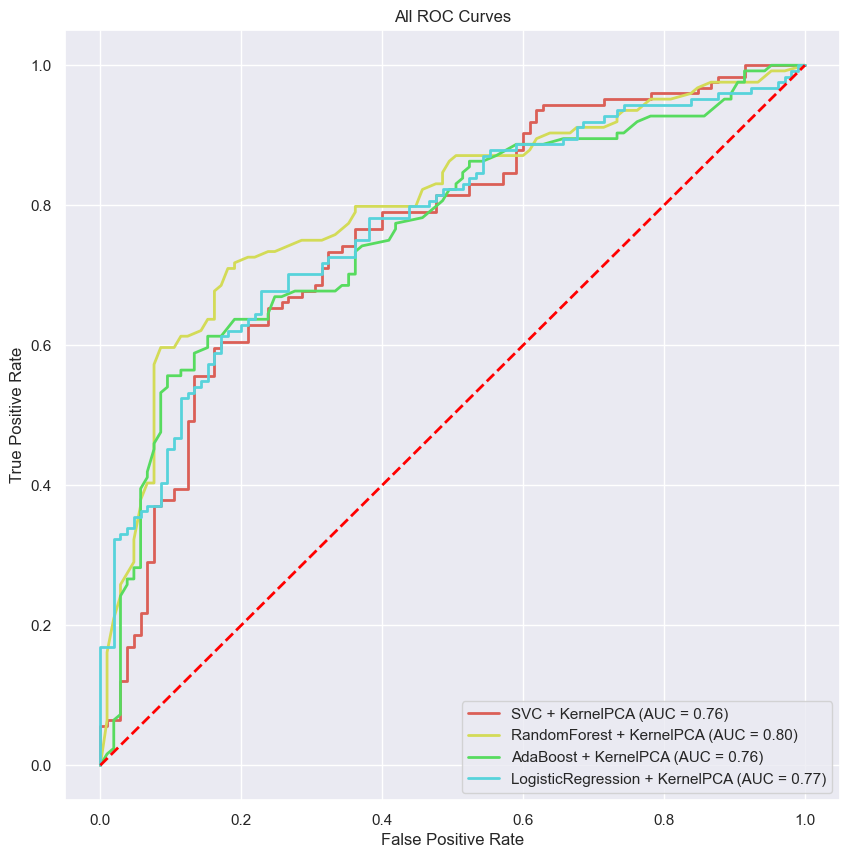

In [144]:
classifiers = {
    'SVC + KernelPCA': SVC(),
    'RandomForest + KernelPCA': RandomForestClassifier(),
    'AdaBoost + KernelPCA':AdaBoostClassifier(),
    'LogisticRegression + KernelPCA' : LogisticRegression()
}

classifiers_cv = {
    'SVC + KernelPCA': SVC(),
    'RandomForest + KernelPCA': RandomForestClassifier(),
    'AdaBoost + KernelPCA':AdaBoostClassifier(),
    'LogisticRegression + KernelPCA' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_kernel_pca,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_kernel_pca, X_test_kernel_pca,
                      y_train, y_test, results)
results.sort_values(by='AUC', ascending=False)

In [145]:
def select_n_components(var_ratio, goal_var):
    total_variance = 0.0
    n_components = 0
    
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break

    return n_components

In [146]:
from sklearn.decomposition import TruncatedSVD


svd = TruncatedSVD(n_components=X_train.shape[1] - 1)
X_train_svd = svd.fit(X_train)

explained_variance_ratio = svd.explained_variance_ratio_

n_components = select_n_components(explained_variance_ratio, 0.95)

svd2 = TruncatedSVD(n_components=n_components)

# Transform both the training and test data to the selected number of components
X_train_svd_selected = svd2.fit_transform(X_train)
X_test_svd_selected = svd2.transform(X_test)

# Print the number of components selected
print(f"Number of components selected: {n_components}")

Number of components selected: 9


In [147]:
print(f'{X_train_svd_selected.shape} i {X_test_svd_selected.shape}')

(914, 9) i (229, 9)


SVC + TSVD... RandomForest + TSVD... AdaBoost + TSVD... LogisticRegression + TSVD... SVC + TSVD:DONE; RandomForest + TSVD:DONE; AdaBoost + TSVD:DONE; LogisticRegression + TSVD:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
RandomForest,NaN,NaN,NaN,0.850883,0.786026,0.807843
RandomForest + TSVD,0.845787,0.773555,0.791645,0.847158,0.759825,0.790875
RandomForest + PCA,0.851601,0.76809,0.78651,0.839171,0.764192,0.790698
SVC + PCA,0.83543,0.757129,0.772341,0.81874,0.768559,0.785425
SVC,0.839278,0.765887,0.782847,0.815668,0.764192,0.784
SVC + TSVD,0.840448,0.760411,0.779319,0.813594,0.746725,0.771654
AdaBoost,NaN,NaN,NaN,0.801728,0.742358,0.766798
RandomForest + KernelPCA,0.812676,0.738514,0.751947,0.797849,0.733624,0.753036
LogisticRegression + PCA,0.82259,0.748343,0.768242,0.78318,0.746725,0.758333


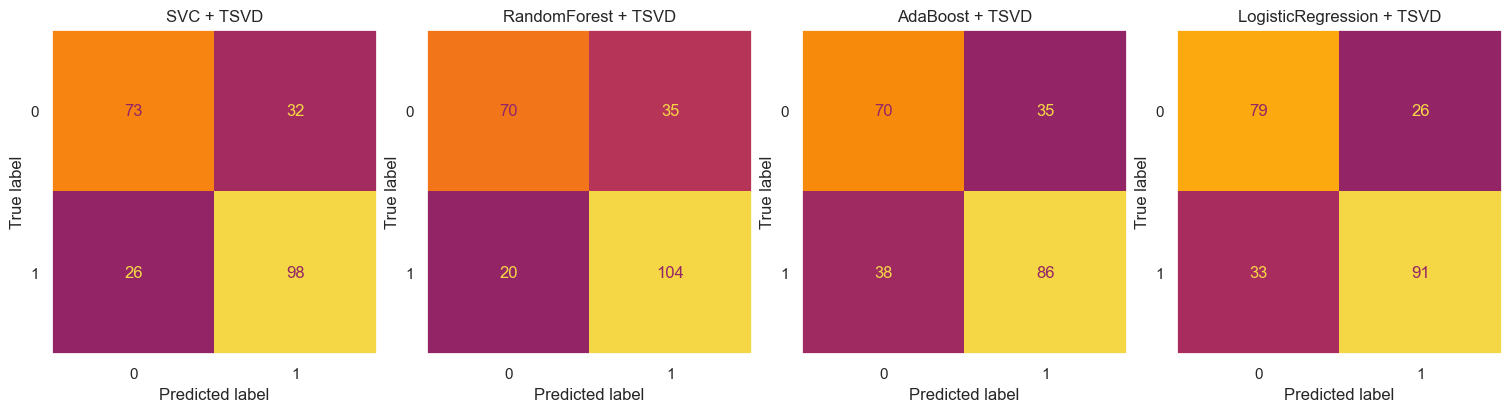

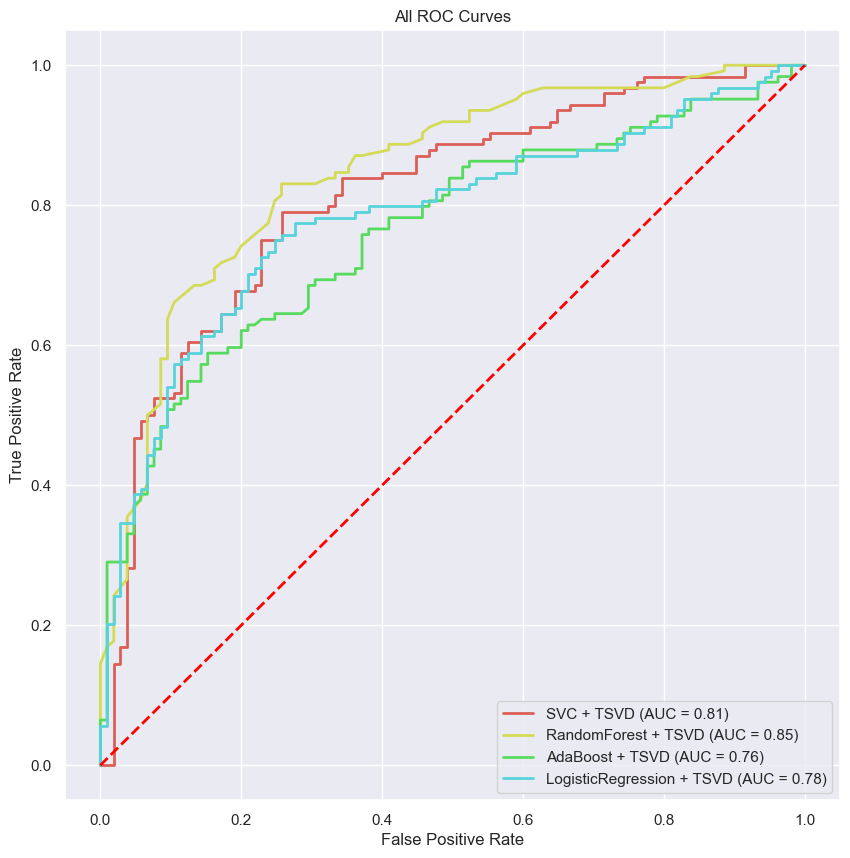

In [148]:
classifiers = {
    'SVC + TSVD': SVC(),
    'RandomForest + TSVD': RandomForestClassifier(),
    'AdaBoost + TSVD':AdaBoostClassifier(),
    'LogisticRegression + TSVD' : LogisticRegression()
}

classifiers_cv = {
    'SVC + TSVD': SVC(),
    'RandomForest + TSVD': RandomForestClassifier(),
    'AdaBoost + TSVD':AdaBoostClassifier(),
    'LogisticRegression + TSVD' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_train_svd_selected,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_train_svd_selected, X_test_svd_selected,
                      y_train, y_test, results)
results.sort_values(by='AUC', ascending=False)

In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=None)
X_lda = lda.fit(X_train,y_train)

lda_var_ratios = lda.explained_variance_ratio_

n_components = select_n_components(lda_var_ratios,0.95)

lda2 = LinearDiscriminantAnalysis(n_components=n_components)


X_train_lda_selected = lda2.fit_transform(X_train,y_train)
X_test_lda_selected = lda2.transform(X_test)

# Print the number of components selected
print(f"Number of components selected: {n_components}")


Number of components selected: 1


In [150]:
print(f'{X_test_lda_selected.shape} ii {X_train_lda_selected.shape}')

(229, 1) ii (914, 1)


SVC + LDA... RandomForest + LDA... AdaBoost + LDA... LogisticRegression + LDA... SVC + LDA:DONE; RandomForest + LDA:DONE; AdaBoost + LDA:DONE; LogisticRegression + LDA:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
RandomForest,NaN,NaN,NaN,0.850883,0.786026,0.807843
RandomForest + TSVD,0.845787,0.773555,0.791645,0.847158,0.759825,0.790875
RandomForest + PCA,0.851601,0.76809,0.78651,0.839171,0.764192,0.790698
SVC + PCA,0.83543,0.757129,0.772341,0.81874,0.768559,0.785425
SVC,0.839278,0.765887,0.782847,0.815668,0.764192,0.784
SVC + TSVD,0.840448,0.760411,0.779319,0.813594,0.746725,0.771654
AdaBoost,NaN,NaN,NaN,0.801728,0.742358,0.766798
RandomForest + KernelPCA,0.812676,0.738514,0.751947,0.797849,0.733624,0.753036
SVC + LDA,0.814033,0.771329,0.790749,0.796544,0.746725,0.756303


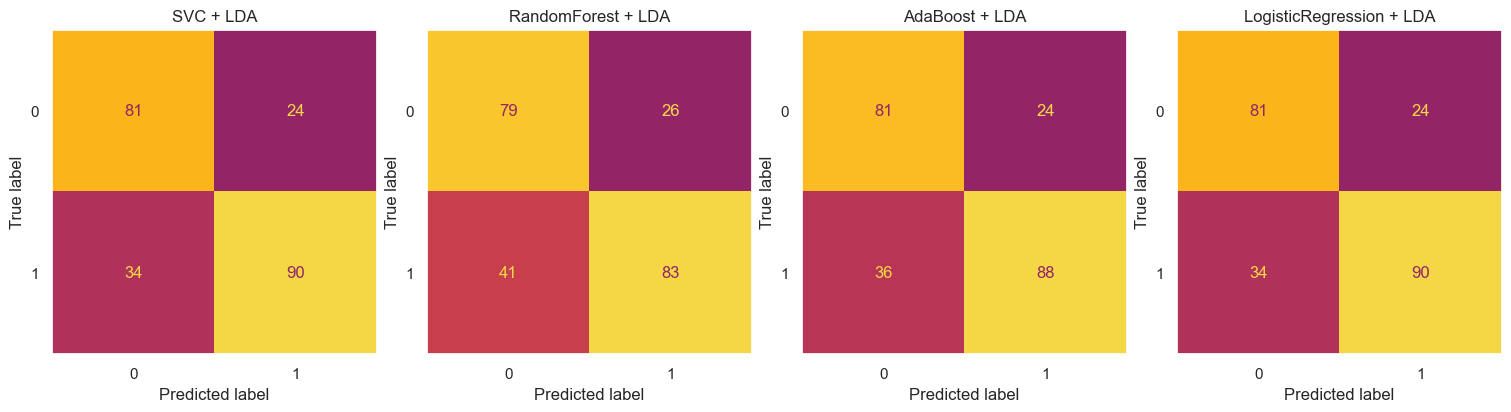

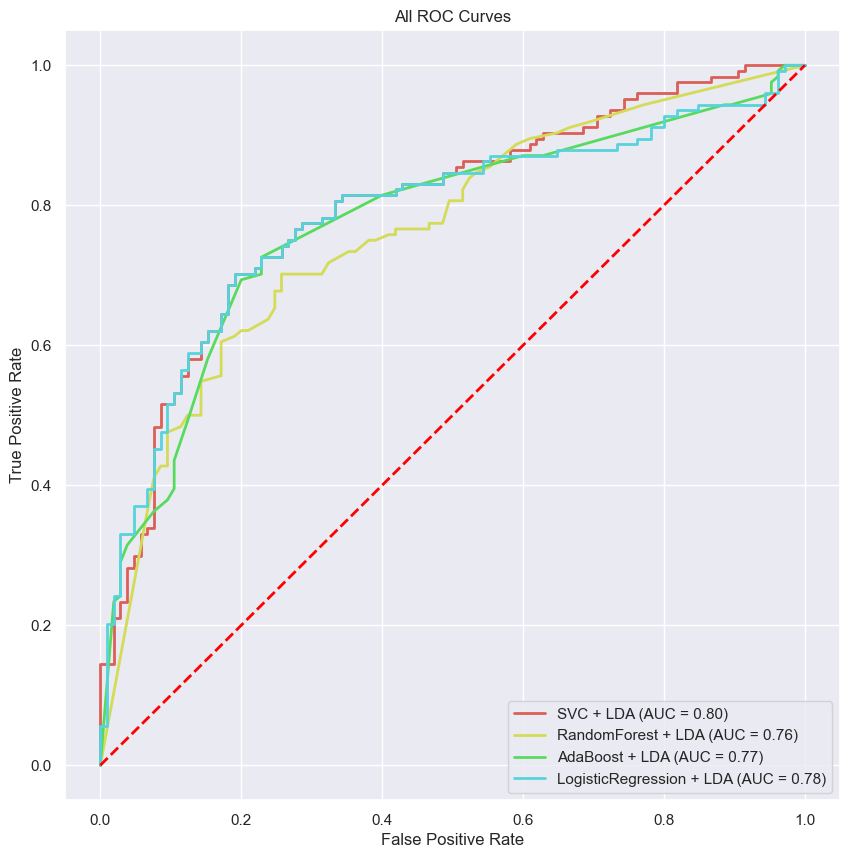

In [151]:
classifiers = {
    'SVC + LDA': SVC(),
    'RandomForest + LDA': RandomForestClassifier(),
    'AdaBoost + LDA':AdaBoostClassifier(),
    'LogisticRegression + LDA' : LogisticRegression()
}

classifiers_cv = {
    'SVC + LDA': SVC(),
    'RandomForest + LDA': RandomForestClassifier(),
    'AdaBoost + LDA':AdaBoostClassifier(),
    'LogisticRegression + LDA' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_train_lda_selected,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_train_lda_selected, X_test_lda_selected,
                      y_train, y_test, results)
results.sort_values(by='AUC', ascending=False)

In [152]:
tsne= TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3)
X_tsne_train = tsne.fit_transform(X_train)
X_tsne_test = tsne.fit_transform(X_test)

print(X_tsne_train.shape)

(914, 2)


SVC + TSNE... RandomForest + TSNE... AdaBoost + TSNE... LogisticRegression + TSNE... SVC + TSNE:DONE; RandomForest + TSNE:DONE; AdaBoost + TSNE:DONE; LogisticRegression + TSNE:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
RandomForest,NaN,NaN,NaN,0.850883,0.786026,0.807843
RandomForest + TSVD,0.845787,0.773555,0.791645,0.847158,0.759825,0.790875
RandomForest + PCA,0.851601,0.76809,0.78651,0.839171,0.764192,0.790698
SVC + PCA,0.83543,0.757129,0.772341,0.81874,0.768559,0.785425
SVC,0.839278,0.765887,0.782847,0.815668,0.764192,0.784
SVC + TSVD,0.840448,0.760411,0.779319,0.813594,0.746725,0.771654
AdaBoost,NaN,NaN,NaN,0.801728,0.742358,0.766798
RandomForest + KernelPCA,0.812676,0.738514,0.751947,0.797849,0.733624,0.753036
SVC + LDA,0.814033,0.771329,0.790749,0.796544,0.746725,0.756303


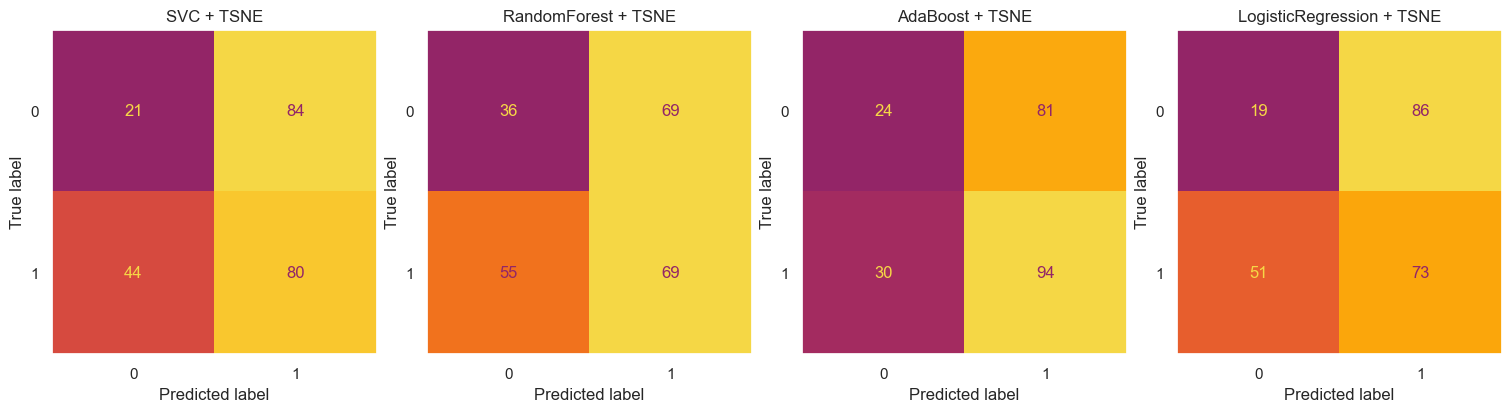

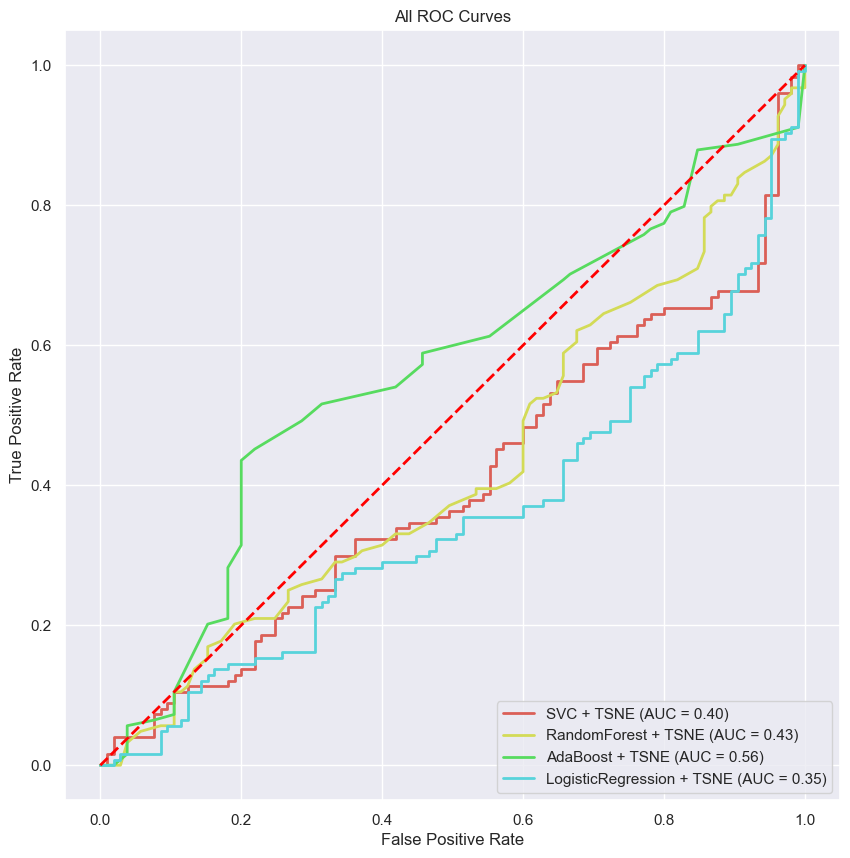

In [153]:
classifiers = {
    'SVC + TSNE': SVC(),
    'RandomForest + TSNE': RandomForestClassifier(),
    'AdaBoost + TSNE': AdaBoostClassifier(),
    'LogisticRegression + TSNE' : LogisticRegression()
}

classifiers_cv = {
    'SVC + TSNE': SVC(),
    'RandomForest + TSNE': RandomForestClassifier(),
    'AdaBoost + TSNE': AdaBoostClassifier(),
    'LogisticRegression + TSNE' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_tsne_train,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_tsne_train, X_tsne_test,
                      y_train, y_test, results)
results.sort_values(by='AUC', ascending=False)

SVC + LLE... RandomForest + LLE... AdaBoost + LLE... LogisticRegression + LLE... SVC + LLE:DONE; RandomForest + LLE:DONE; AdaBoost + LLE:DONE; LogisticRegression + LLE:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
RandomForest,NaN,NaN,NaN,0.850883,0.786026,0.807843
RandomForest + TSVD,0.845787,0.773555,0.791645,0.847158,0.759825,0.790875
RandomForest + PCA,0.851601,0.76809,0.78651,0.839171,0.764192,0.790698
SVC + PCA,0.83543,0.757129,0.772341,0.81874,0.768559,0.785425
SVC,0.839278,0.765887,0.782847,0.815668,0.764192,0.784
SVC + TSVD,0.840448,0.760411,0.779319,0.813594,0.746725,0.771654
AdaBoost,NaN,NaN,NaN,0.801728,0.742358,0.766798
RandomForest + KernelPCA,0.812676,0.738514,0.751947,0.797849,0.733624,0.753036
SVC + LDA,0.814033,0.771329,0.790749,0.796544,0.746725,0.756303


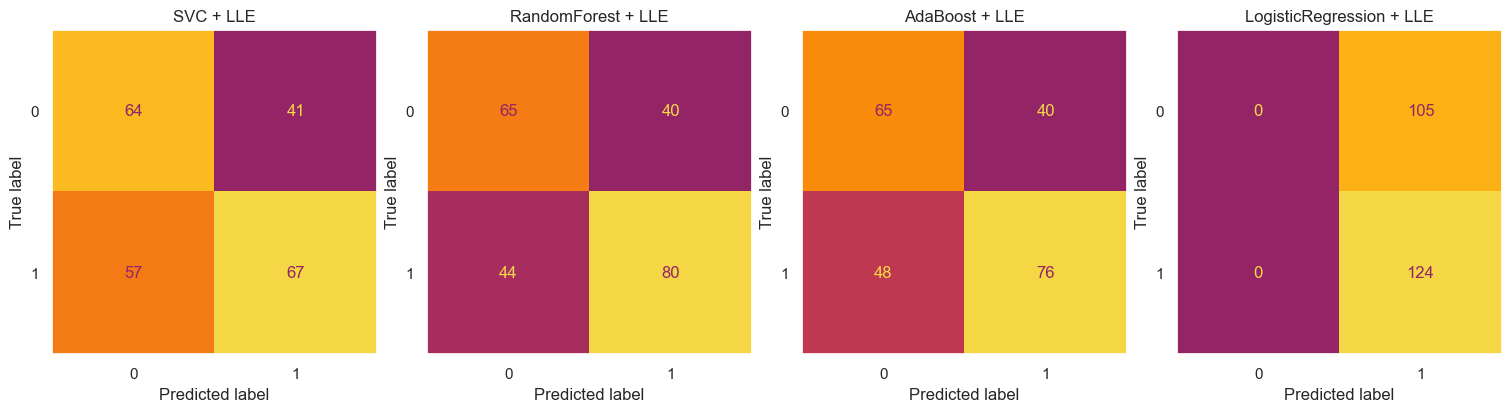

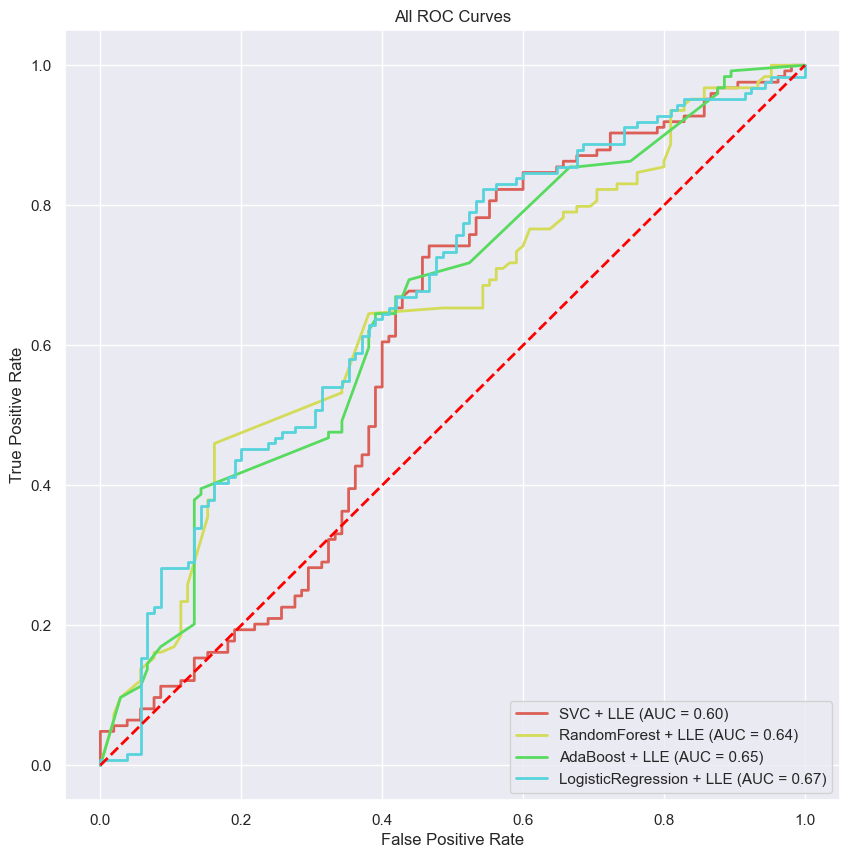

In [154]:
lle = LocallyLinearEmbedding(n_neighbors=5, n_components=2)
X_lle = lle.fit_transform(X_train)
X_lle_test = lle.fit_transform(X_test)

classifiers = {
    'SVC + LLE': SVC(),
    'RandomForest + LLE': RandomForestClassifier(),
    'AdaBoost + LLE': AdaBoostClassifier(),
    'LogisticRegression + LLE' : LogisticRegression()
}

classifiers_cv = {
    'SVC + LLE': SVC(),
    'RandomForest + LLE': RandomForestClassifier(),
    'AdaBoost + LLE': AdaBoostClassifier(),
    'LogisticRegression + LLE' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_lle,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_lle, X_lle_test,
                      y_train, y_test, results)
results.sort_values(by='AUC', ascending=False)

SVC + Isomap... RandomForest + Isomap... AdaBoost + Isomap... LogisticRegression + Isomap... SVC + Isomap:DONE; RandomForest + Isomap:DONE; AdaBoost + Isomap:DONE; LogisticRegression + Isomap:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
RandomForest,NaN,NaN,NaN,0.850883,0.786026,0.807843
RandomForest + TSVD,0.845787,0.773555,0.791645,0.847158,0.759825,0.790875
RandomForest + PCA,0.851601,0.76809,0.78651,0.839171,0.764192,0.790698
SVC + PCA,0.83543,0.757129,0.772341,0.81874,0.768559,0.785425
SVC,0.839278,0.765887,0.782847,0.815668,0.764192,0.784
SVC + TSVD,0.840448,0.760411,0.779319,0.813594,0.746725,0.771654
RandomForest + Isomap,0.804171,0.726488,0.752419,0.803379,0.71179,0.738095
AdaBoost,NaN,NaN,NaN,0.801728,0.742358,0.766798
RandomForest + KernelPCA,0.812676,0.738514,0.751947,0.797849,0.733624,0.753036


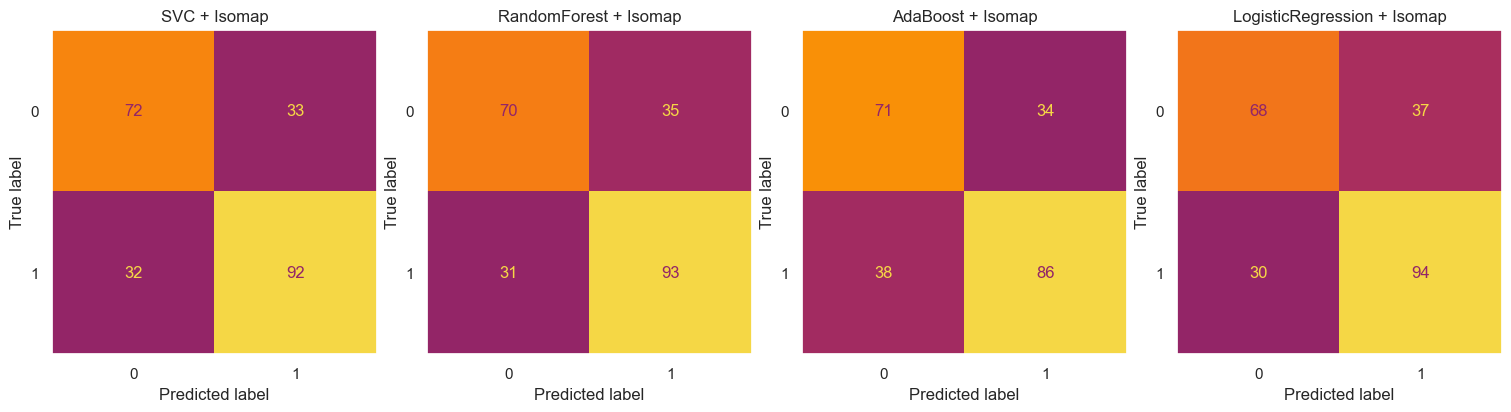

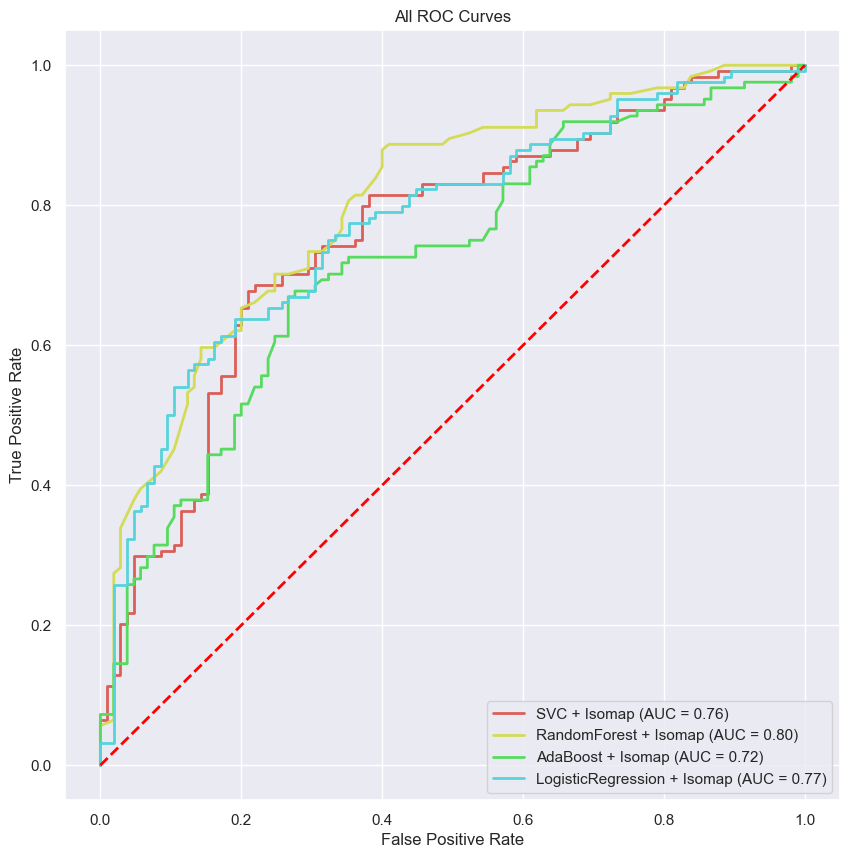

In [155]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=5)
X_isomap_train = isomap.fit_transform(X_train)
X_isomap_test = isomap.transform(X_test)

classifiers = {
    'SVC + Isomap': SVC(),
    'RandomForest + Isomap': RandomForestClassifier(),
    'AdaBoost + Isomap': AdaBoostClassifier(),
    'LogisticRegression + Isomap' : LogisticRegression()
}

classifiers_cv = {
    'SVC + Isomap': SVC(),
    'RandomForest + Isomap': RandomForestClassifier(),
    'AdaBoost + Isomap': AdaBoostClassifier(),
    'LogisticRegression + Isomap' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_isomap_train,
                      y_train, results=results, cv=3)

results = test_models(classifiers, X_isomap_train, X_isomap_test,
                      y_train, y_test, results)
results.sort_values(by='AUC', ascending=False)


In [156]:
norm = Normalizer()
df2[numerical_data] = norm.fit_transform(df2[numerical_data])

In [157]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.221767,0.013914,0.007083,0.064724,0.002264,0.307934,0.832997,0.026323,0.087430,0.017193,0.278067,0.543307
std,0.129560,0.009415,0.007272,0.046350,0.001679,0.114359,0.117900,0.013876,0.046213,0.009591,0.152661,0.498339
min,0.027062,0.001028,0.000000,0.007771,0.000112,0.021791,0.359981,0.003402,0.010311,0.001747,0.042134,0.000000
25%,0.114538,0.007257,0.001875,0.033655,0.001186,0.221244,0.768227,0.014764,0.049240,0.009471,0.152376,0.000000
50%,0.187490,0.011457,0.004309,0.054365,0.001885,0.292987,0.856616,0.023347,0.078163,0.015172,0.247896,1.000000
75%,0.308573,0.017849,0.010208,0.081858,0.002847,0.384365,0.924179,0.036206,0.120437,0.023624,0.384891,1.000000
max,0.647914,0.090784,0.038751,0.486839,0.020401,0.621347,0.990514,0.064150,0.218226,0.061545,0.731567,1.000000


In [158]:
X2 = df2.drop('quality', axis=1)
y2 = df2['quality']

In [159]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, stratify=y2)

SVC + NMF... RandomForest + NMF... AdaBoost + NMF... LogisticRegression + NMF... SVC + NMF:DONE; RandomForest + NMF:DONE; AdaBoost + NMF:DONE; LogisticRegression + NMF:DONE; 

,CV-AUC,CV-Accuracy,CV-F1,AUC,Accuracy,F1
Algorithm,,,,,,
RandomForest,NaN,NaN,NaN,0.850883,0.786026,0.807843
RandomForest + TSVD,0.845787,0.773555,0.791645,0.847158,0.759825,0.790875
RandomForest + PCA,0.851601,0.76809,0.78651,0.839171,0.764192,0.790698
SVC + PCA,0.83543,0.757129,0.772341,0.81874,0.768559,0.785425
SVC,0.839278,0.765887,0.782847,0.815668,0.764192,0.784
SVC + TSVD,0.840448,0.760411,0.779319,0.813594,0.746725,0.771654
RandomForest + Isomap,0.804171,0.726488,0.752419,0.803379,0.71179,0.738095
AdaBoost,NaN,NaN,NaN,0.801728,0.742358,0.766798
RandomForest + KernelPCA,0.812676,0.738514,0.751947,0.797849,0.733624,0.753036


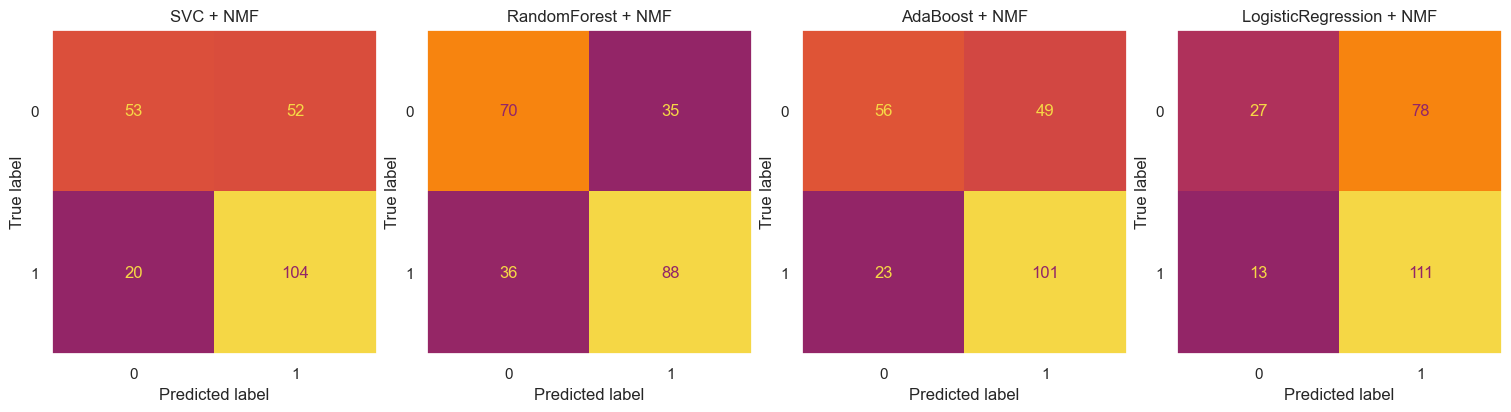

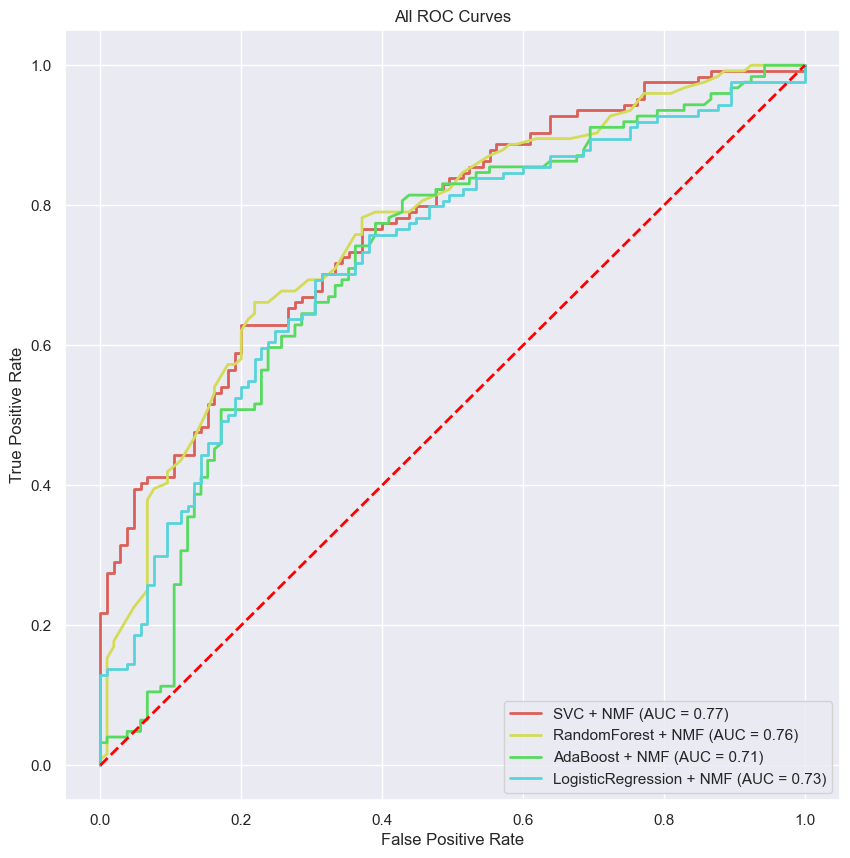

In [160]:
nmf = NMF(n_components=8, random_state=1)

X_train_nmf = nmf.fit_transform(X_train2)
X_test_nmf = nmf.transform(X_test2)

classifiers = {
    'SVC + NMF': SVC(),
    'RandomForest + NMF': RandomForestClassifier(),
    'AdaBoost + NMF': AdaBoostClassifier(),
    'LogisticRegression + NMF' : LogisticRegression()
}

classifiers_cv = {
    'SVC + NMF': SVC(),
    'RandomForest + NMF': RandomForestClassifier(),
    'AdaBoost + NMF': AdaBoostClassifier(),
    'LogisticRegression + NMF' : LogisticRegression()
}

cross_validate_models(classifiers_cv, X_train_nmf,
                      y_train2, results=results, cv=3)

results = test_models(classifiers, X_train_nmf, X_test_nmf,
                      y_train2, y_test2, results)
results.sort_values(by='AUC', ascending=False)

## Feature Selection

<Axes: >

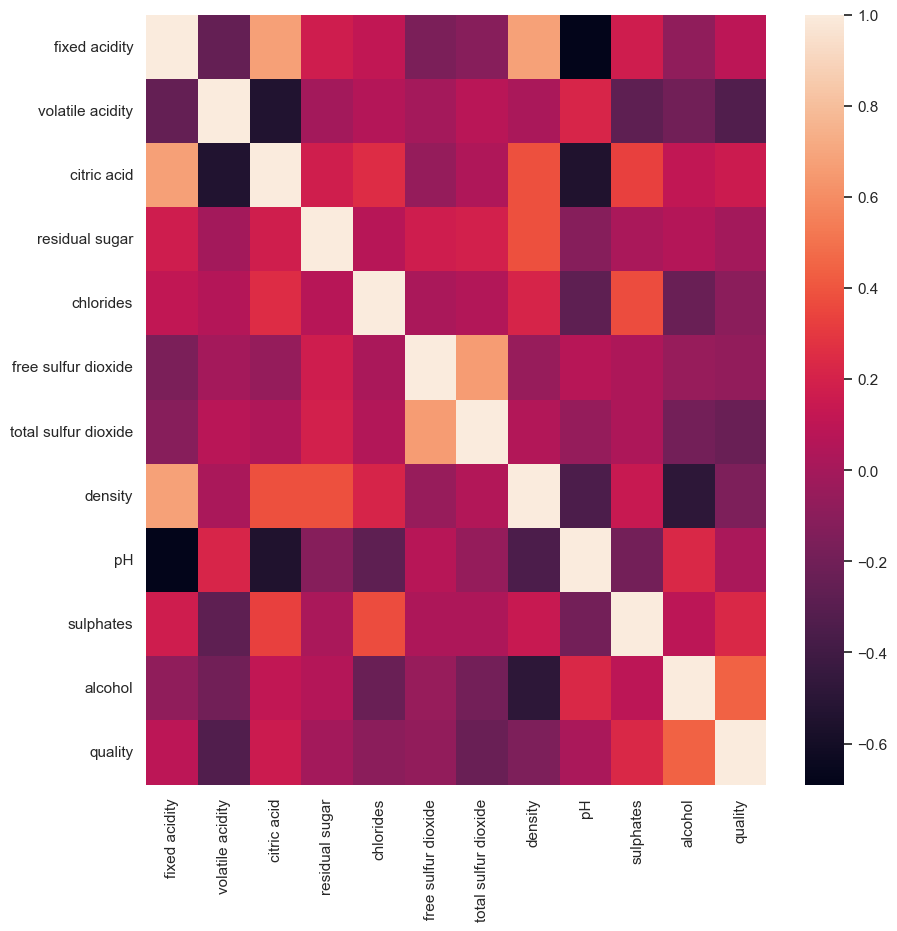

In [161]:
corr = df.corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=corr, annot=False, ax=ax)

RandomForest:DONE; AdaBoost:DONE; 

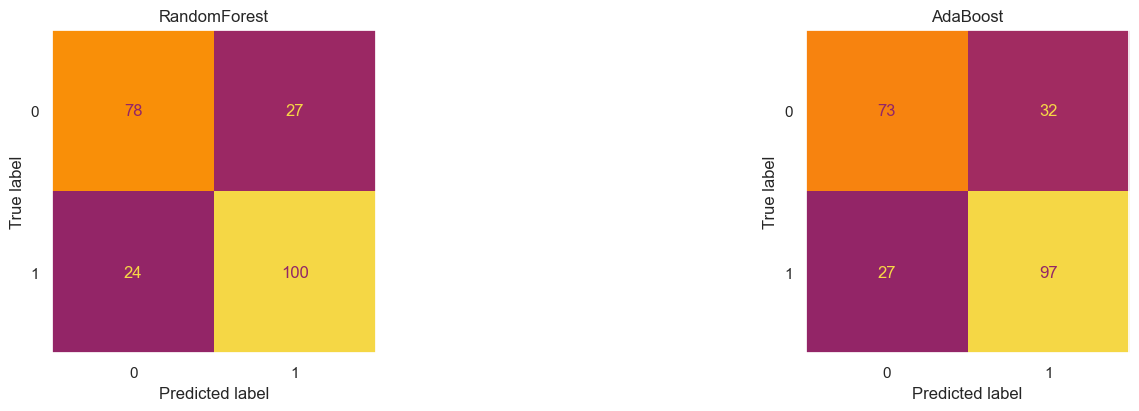

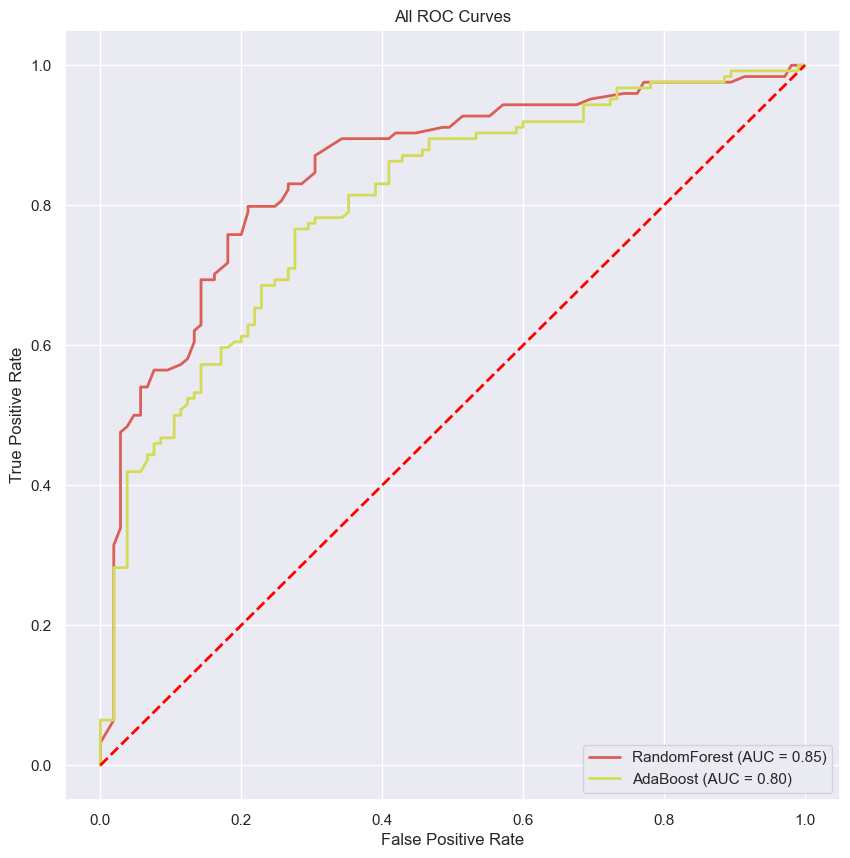

In [162]:
models = {
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier()
}
results = test_models(models, X_train,
                      X_test, y_train, y_test, results)

feat_importances_df = pd.DataFrame(
    columns=['RandomForest','AdaBoost','Lasso'])

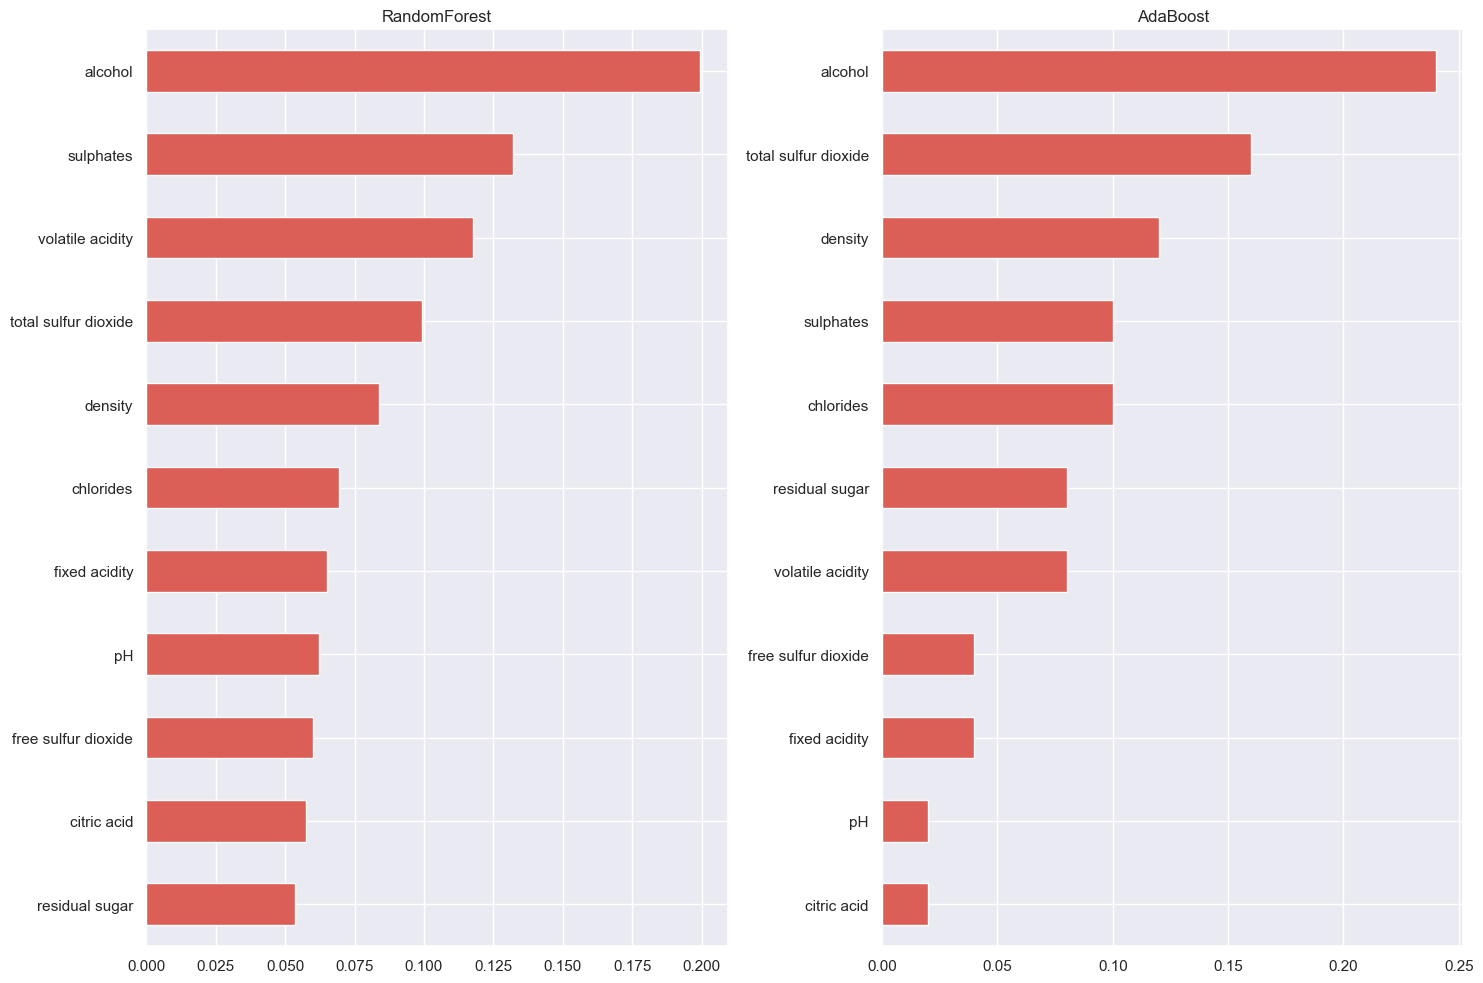

In [163]:
plt.figure(figsize=(15, 10))
for i, name in enumerate(models):
    classifier = models[name]
    feat_importances = pd.Series(
        classifier.feature_importances_, index=X.columns)
    plt.subplot(1, len(models), i+1)
    feat_importances_df[name] = feat_importances
    feat_importances.sort_values().plot(kind='barh')
    plt.title(name)
plt.tight_layout()
plt.show()

In [164]:
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

lasso1_coef = np.abs(lasso1.coef_)
pd_lasso1 = pd.DataFrame(lasso1_coef, index=X.columns, columns=['coef'])
pd_lasso1.sort_values(by='coef', ascending=False, inplace=True)
feat_importances_df['Lasso'] = pd_lasso1['coef']

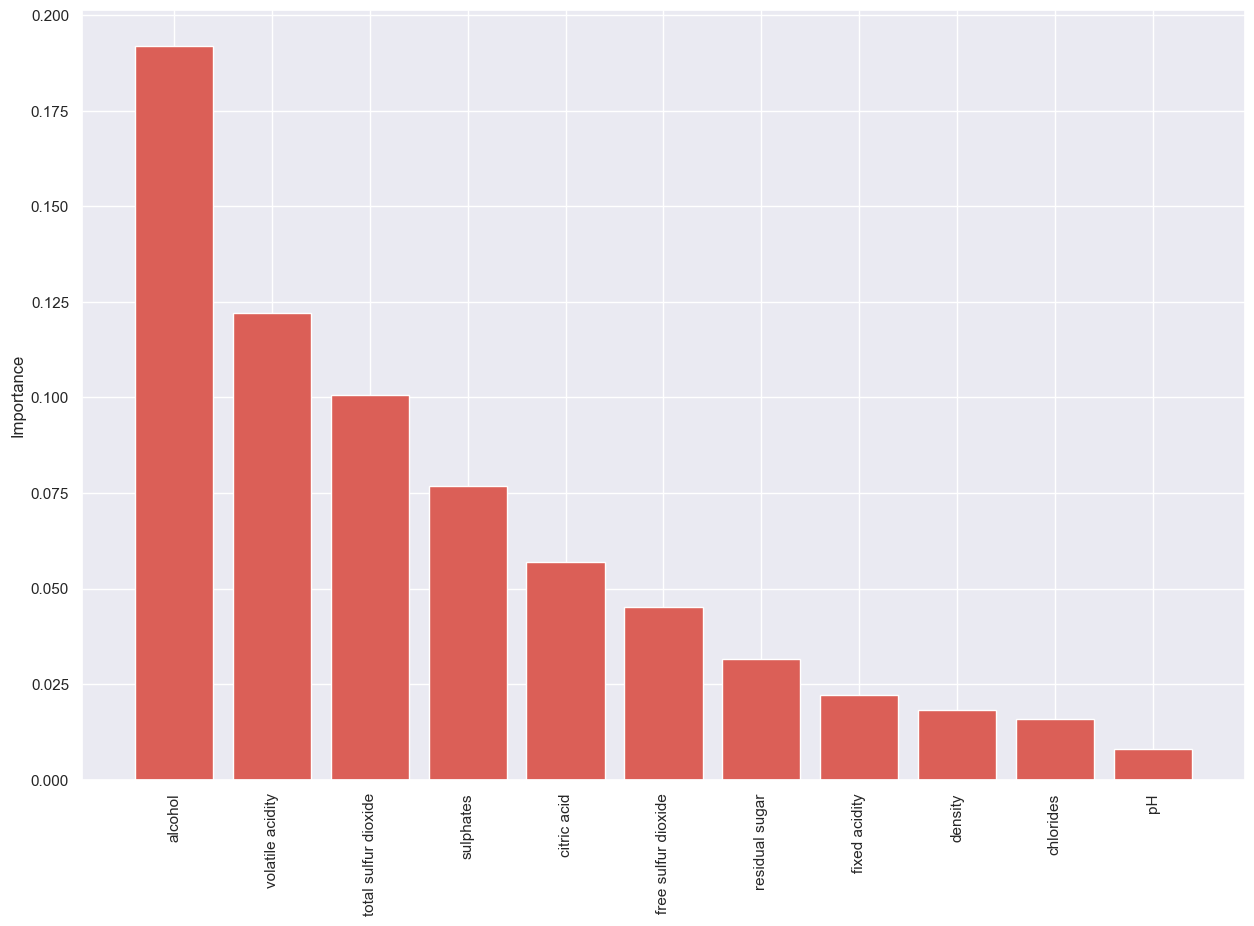

In [165]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.bar(pd_lasso1.index, pd_lasso1['coef'])
plt.ylabel("Importance")
plt.show()

In [166]:
feat_importances_df.sort_values(
    by='Lasso', ascending=False)

,RandomForest,AdaBoost,Lasso
alcohol,0.199449,0.24,0.191935
volatile acidity,0.117670,0.08,0.122211
total sulfur dioxide,0.099212,0.16,0.100641
sulphates,0.131951,0.10,0.076842
citric acid,0.057391,0.02,0.056938
free sulfur dioxide,0.059855,0.04,0.045057
residual sugar,0.053645,0.08,0.031442
fixed acidity,0.065132,0.04,0.022061
density,0.083887,0.12,0.018274
chlorides,0.069529,0.10,0.015925
